<span style="font-size:200%;color:pink">week47 assignment4 data simulation</span>  
<span style="font-size:150%;color:silver">Anna Ceruti, Nikita Julie Myrting & Yudai Nishi</span>

In [11]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from math import sqrt
from statistics import mean
from scipy.stats import norm
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<span style="font-size:125%;color:pink">Mean

In [12]:
avg_PH = 87.7
avg_PL = 40.3

<span style="font-size:125%;color:pink">Standard Deviation

SE to SD function

In [13]:
# function to convert standard error to standard deviation
def SE_to_SD(se,n):
    sd = se * sqrt(n)
    return(sd)

SE to SD

In [14]:
# set the number of participants (from the paper)
n = 80

## calculating average of standard error
se_avg_PH = (1.7 + 1.7 + 3.4 + 1.2 + 1.6 + 2.4 + 1.6 + 1.2) / 8
se_avg_PL = (2.4 + 2.9 + 3.0 + 3.1 + 1.7 + 2.1 + 1.9 + 1.9) / 8

## then convert standard error into standard deviation
SD_PH = SE_to_SD(se_avg_PH, 80)
SD_PL = SE_to_SD(se_avg_PL, 80)

<span style="font-size:125%;color:pink">sample from a normal distribution for each combination of mean, SD, and n

function to sample from a normail distribution

In [15]:
# function to sample from a normail distribution
# not really necessary, now that I think about it, but maybe it makes the code a little clearer below
def take_sample (mean, sd, n):
    nums = np.random.normal(loc = mean, scale = sd, size = n)
    return(nums)

sampling

In [16]:
dist_PH = take_sample(avg_PH, SD_PH, n)
dist_PL = take_sample(avg_PL, SD_PL, n)

<span style="font-size:125%;color:pink">put the result in the dataframe

In [17]:
data = pd.DataFrame({'PH': dist_PH,
                     'PL': dist_PL})
data

,PH,PL
0,63.199810,38.125445
1,79.184874,31.367988
2,126.088583,30.873827
3,96.590435,26.984174
4,75.437248,56.548704
...,...,...
75,100.681260,45.146656
76,81.321254,61.855472
77,69.085657,37.519456
78,73.685101,48.044073


<span style="font-size:125%;color:pink">effect size

calculate effect size by using pingouin

In [18]:
pg.compute_effsize(data.PH, data.PL, paired=True, eftype='cohen')

2.496280173907306

estimate the distribution of effect size

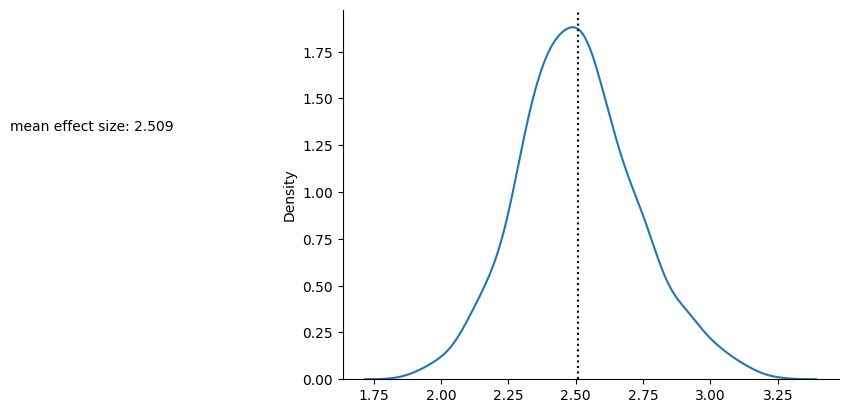

In [21]:
effect_sizes = []
runs = 1000

for i in range(runs):
    dist_PH = take_sample(avg_PH, SD_PH, n)
    dist_PL = take_sample(avg_PL, SD_PL, n)

    data = pd.DataFrame({'PH': dist_PH,
                         'PL': dist_PL})
    
    effect_sizes.append(pg.compute_effsize(data.PH, data.PL, paired=True, eftype='cohen').round(3))

ax = sns.kdeplot(effect_sizes)
mean_effect_size = round(np.array(effect_sizes).mean(), 3)
ax.axvline(x = mean_effect_size, color = 'black', linestyle = 'dotted')
ax.text(0.4, 1.33, 'mean effect size: ' + str(mean_effect_size))
sns.despine()